In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances

In [30]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
 
import pandas as pd
import numpy as np
from pandas import DataFrame

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)
 
%matplotlib inline

In [23]:
grades = np.array([90, 95, 93,
70, 78, 73,
69, 79, 79,
90, 99, 100,
80, 60, 95,
100, 93, 99,
80, 59, 80,
74, 45, 80,
95, 93, 99,
40, 59, 70,
100, 60, 60,
89, 83, 100,
35, 50, 60,
100, 95, 91,
70, 68, 67,
40, 56, 80,
44, 57, 73,
90, 60, 70,
41, 52, 72,
70, 80, 100,
77, 89, 100,
72, 91, 100,
90, 60, 60])
grades = grades.reshape(23, -1)
grades_df = DataFrame(grades, index = ["John", "Peter", "Adrian", "Rene", "Carlos",
                                       "Ana", "Bert", "Rachel", "Martin", "Marina",
                                       "Aspen", "Dart", "Josh", "Ken", "Ron",
                                       "Susan", "Marta", "Fabian", "Albert",
                                        "Carl","Hector", "Nancy", "Sabrina"])
grades_df.columns = [["English", "Math", "Science"]]
grades_df

,English,Math,Science
John,90,95,93
Peter,70,78,73
Adrian,69,79,79
Rene,90,99,100
Carlos,80,60,95
Ana,100,93,99
Bert,80,59,80
Rachel,74,45,80
Martin,95,93,99
Marina,40,59,70


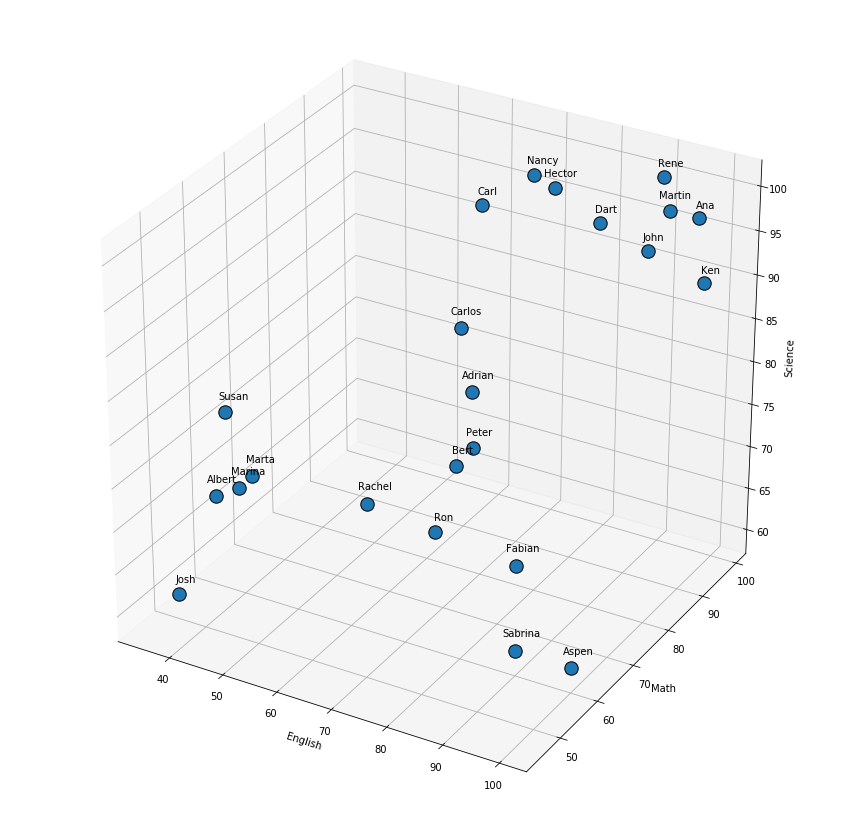

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = grades_df.English, ys = grades_df.Math, zs = grades_df.Science, s= 180, edgecolor = 'black', depthshade = False)
for name, eng, math, sci in grades_df[['English', 'Math', 'Science']].itertuples(index=True, name=None):
    ax.text(eng - len(name)/2 - 0.5, math + 2.5, sci, name)

ax.set_xlabel('English')
ax.set_ylabel('Math')
ax.set_zlabel('Science')

plt.show()

In [25]:
from sklearn.metrics.pairwise import euclidean_distances
grades_distance_df = DataFrame(euclidean_distances(grades_df))
grades_distance_df.astype(int)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,33,29,8,36,11,39,54,8,65,...,10,42,64,62,41,68,25,15,19,48
1,33,0,6,39,30,42,22,33,39,35,...,38,11,37,33,27,38,27,29,30,29
2,29,6,0,35,27,39,22,34,35,36,...,36,16,37,33,29,39,21,24,24,34
3,8,39,35,0,40,11,45,59,7,70,...,14,49,68,67,49,73,27,16,19,55
4,36,30,27,40,0,38,15,22,36,47,...,40,30,42,42,26,45,22,29,32,36
5,11,42,39,11,38,0,43,57,5,74,...,8,50,73,71,45,76,32,23,28,52
6,39,22,22,45,15,43,0,15,41,41,...,42,18,40,36,14,40,30,36,38,22
7,54,33,34,59,22,57,15,0,55,38,...,57,26,35,33,24,34,40,48,50,29
8,8,39,35,7,36,5,41,55,0,70,...,9,47,68,67,44,72,28,18,23,51
9,65,35,36,70,47,74,41,38,70,0,...,73,31,10,5,50,7,47,56,54,51


In [29]:
Z = linkage(grades_df, 'average')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, leaf_font_size = 32.)
plt.show()

NameError: name 'linkage' is not defined

In [28]:
plt.figure(figsize=(25, 10))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=23, 
               labels = grades_df.index)

NameError: name 'dendrogram' is not defined

<Figure size 1800x720 with 0 Axes>

In [11]:
grades_distance_df = DataFrame(euclidean_distances(grades_df))

In [12]:
grades_distance_df.astype(int)

,0,1,2,3,4,5,6,7,8,9
0,0,33,39,8,12,11,39,32,52,14
1,33,0,14,39,26,42,22,28,22,22
2,39,14,0,45,30,46,12,21,19,27
3,8,39,45,0,15,11,45,34,59,22
4,12,26,30,15,0,21,32,21,45,15
5,11,42,46,11,21,0,43,36,59,21
6,39,22,12,45,32,43,0,23,22,26
7,32,28,21,34,21,36,23,0,41,28
8,52,22,19,59,45,59,22,41,0,38
9,14,22,27,22,15,21,26,28,38,0


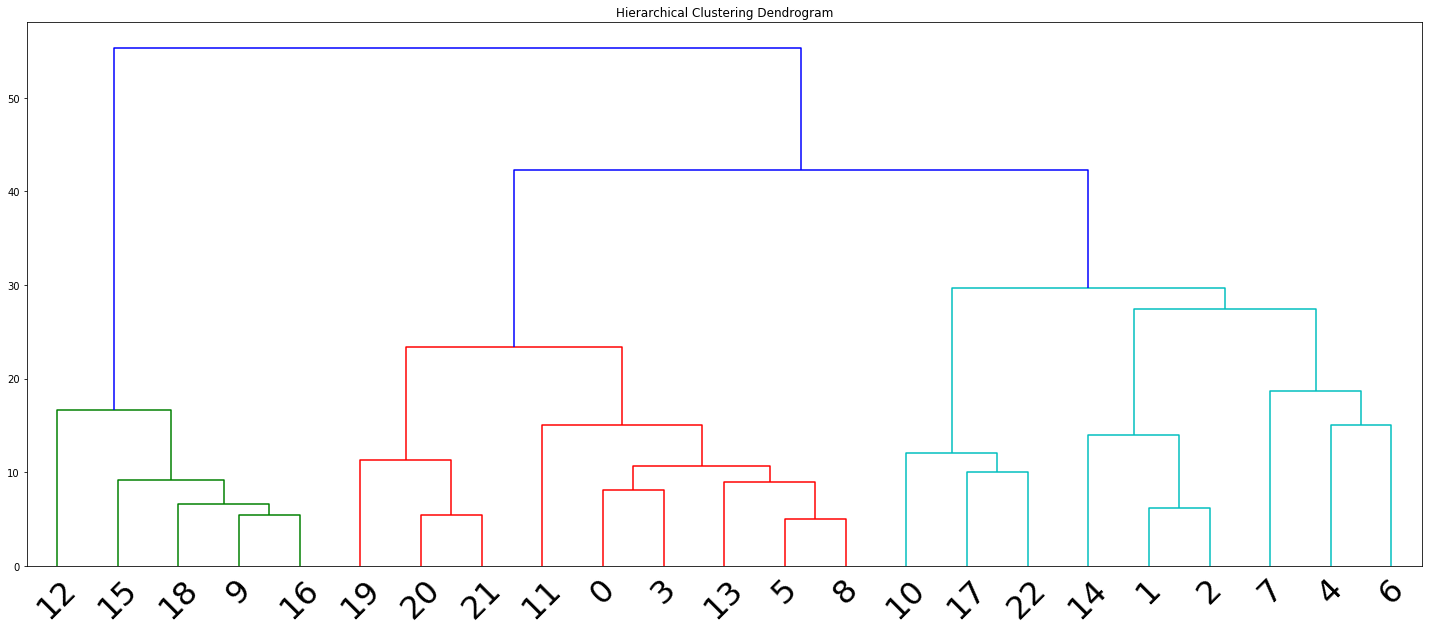

In [31]:
Z = linkage(grades_df, 'average')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, leaf_font_size = 32.)
plt.show()

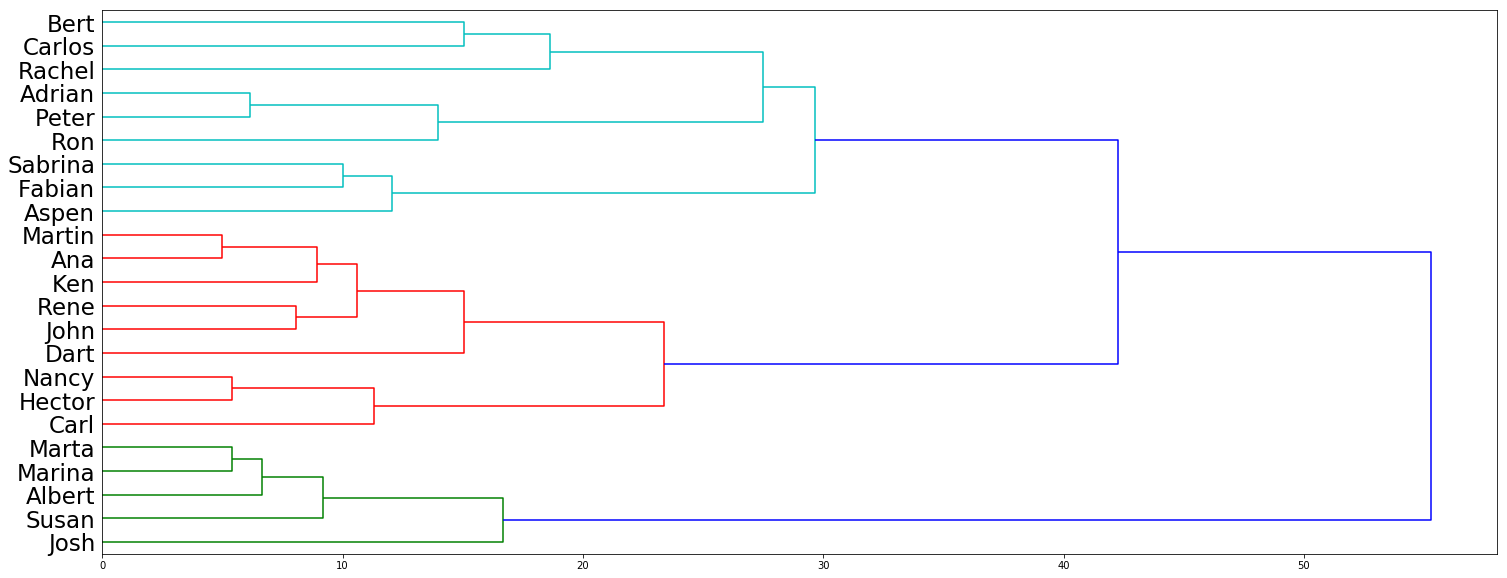

In [32]:
plt.figure(figsize=(25, 10))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=23, 
               labels = grades_df.index)